# 회귀모델 (hf=wx+b)
* 단순 회귀모델
* 다중 회귀모델

In [3]:
import tensorflow as tf

### 단순회귀 모델(hf = wx+b)   
* hf:예측값, 오류:hf-ytrain

In [15]:
### 그래프 정의부
'''
입력 데이터 정의 : xtrain=read_csv/open(python)/DB연동 

가설 함수 정의 : hf=w*x+b
cost 함수 정의 : 1/n* sum(hf예측값-y실제값)^
    
                cost함수를 통해 w와 b를 계산하면서 오류가 적은 방향으로 학습하게 된다.
                cost를 minimize하는 과정에서 Gradient descent algorithm을 적용해보자
            
train node를 실행함으로써 0.01로 학습률을 정하면서 cost를 minimize한다
xtrain=[1,2,3] # 실제 입력값(데이터값)
ytrain=[1,2,3] # 실제 결과값
b=tf.Variable(tf.random_normal([1])) # b는 계속 갱신되는 데이터이므로 --> 변수(Variable) 타입이어야한다
w=tf.Variable(tf.random_normal([1]))

hf=xtrain*w+b
cost = tf.reduce_mean(tf.square(hf-ytrain)) # 계산하면 차원이 줄어들어서 reduce_가 붙는다

opt = tf.train.GradientDescentOptimizer(0.01) # cost를 최소화하는 것을 optimize한다 --> w를 업데이트한다
                                       # learning rate만 ()안에 인자로 넘겨주면 된다.
'''
train=opt.minimize(cost)
# train=tf.train.GradientDescentOptimizer(0.01).minimize() --> 한줄로 줄여쓸 수 있음

sess=tf.Session()
sess.run(tf.global_variables_initializer())

### 그래프 실행부분

# 트레이닝(머신러닝)
for step in range(2001):   
    sess.run(train)
    if step %20==0:
        print("w=  ",sess.run(w),"b=",sess.run(b),"cost : ",sess.run(cost))

# 트레이닝 과정
'''
print("step1 : ")
print("w=",sess.run(w),"b=",sess.run(b))
print("cost : ",sess.run(cost))

print(sess.run(train)) # --> train과정을 거친다.(train노드는 학습시키는 것이므로 출력 결과가 없다) 

print("step2 : ")
print("w=",sess.run(w),"b=",sess.run(b)) # --> w와 b 값이 업데이트 된다
print("cost : ",sess.run(cost))

print(sess.run(train)) # --> train과정을 거친다

print("step3 : ")
print("w=",sess.run(w),"b=",sess.run(b))  # --> w와 b 값이 업데이트 된다
print("cost : ",sess.run(cost))
'''

# print(sess.run(b))
# print(sess.run(w))
# random_normal:정규 분포를 따르는 난수 
# random_equal: 균등 분포를 따르는 난수

w=   [-0.13874662] b= [0.8793533] cost :  2.8192914
w=   [0.45517737] b= [1.075753] cost :  0.19808076
w=   [0.53223926] b= [1.0478327] cost :  0.15848053
w=   [0.55912185] b= [1.000744] cost :  0.1437404
w=   [0.5803081] b= [0.9539179] cost :  0.13054559
w=   [0.60007644] b= [0.9091069] cost :  0.118563615
w=   [0.61887556] b= [0.866384] cost :  0.10768133
w=   [0.6367874] b= [0.8256675] cost :  0.09779797
w=   [0.6538571] b= [0.7868643] cost :  0.08882171
w=   [0.67012453] b= [0.7498845] cost :  0.08066926
w=   [0.6856275] b= [0.7146426] cost :  0.07326511
w=   [0.7004018] b= [0.6810571] cost :  0.06654058
w=   [0.71448183] b= [0.64904994] cost :  0.060433213
w=   [0.7279002] b= [0.61854684] cost :  0.054886356
w=   [0.74068785] b= [0.5894774] cost :  0.04984868
w=   [0.75287455] b= [0.56177425] cost :  0.045273423
w=   [0.7644884] b= [0.535373] cost :  0.041118048
w=   [0.77555674] b= [0.5102123] cost :  0.03734402
w=   [0.7861047] b= [0.4862343] cost :  0.033916477
w=   [0.79615706

'\nprint("step1 : ")\nprint("w=",sess.run(w),"b=",sess.run(b))\nprint("cost : ",sess.run(cost))\n\nprint(sess.run(train)) # --> train과정을 거친다.(train노드는 학습시키는 것이므로 출력 결과가 없다) \n\nprint("step2 : ")\nprint("w=",sess.run(w),"b=",sess.run(b)) # --> w와 b 값이 업데이트 된다\nprint("cost : ",sess.run(cost))\n\nprint(sess.run(train)) # --> train과정을 거친다\n\nprint("step3 : ")\nprint("w=",sess.run(w),"b=",sess.run(b))  # --> w와 b 값이 업데이트 된다\nprint("cost : ",sess.run(cost))\n'

## placeholder를 사용한 학습

In [23]:
w=tf.Variable(tf.random_normal([1]),name='weight') # 지금은 공부용으로 [1]이지만, [3,2]처럼 나중엔 shape을 따져야함
b=tf.Variable(tf.random_normal([1]),name='bias')

In [24]:
#트레이닝 되어지는 데이터의 건수가 변화할 수 있으므로, 행자리는 None으로 준다
x=tf.placeholder(tf.float32,shape=[None])
y=tf.placeholder(tf.float32,shape=[None])

hf=x*w+b # 실제로는 matmul을 사용하여야한다!!

cost= tf.reduce_mean(tf.square(hf-y))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [27]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv,wv,bv,_ = sess.run([cost,w,b,train], feed_dict={x:[1,2,3],y:[1,2,3]}) # 여러 가지 노드를 한번에 실행할 경우, list형태로 넣어주면 된다
    if step%20==0:
        print(step,cv,wv,bv)

0 0.73005414 [0.812752] [-0.37076744]
20 0.0141869215 [1.07335] [-0.24257654]
40 0.0070018065 [1.0938787] [-0.2206293]
60 0.006305801 [1.0917498] [-0.20925626]
80 0.0057265568 [1.0876554] [-0.19932641]
100 0.005200956 [1.0835564] [-0.18994972]
120 0.004723583 [1.0796316] [-0.18102188]
140 0.0042900285 [1.0758893] [-0.17251442]
160 0.0038962765 [1.0723228] [-0.16440688]
180 0.00353866 [1.068924] [-0.15668036]
200 0.003213862 [1.0656847] [-0.14931694]
220 0.002918885 [1.062598] [-0.14229959]
240 0.0026509855 [1.0596559] [-0.13561216]
260 0.0024076698 [1.0568523] [-0.12923886]
280 0.0021866774 [1.0541805] [-0.12316509]
300 0.00198598 [1.0516343] [-0.11737679]
320 0.0018036952 [1.0492077] [-0.11186056]
340 0.0016381536 [1.0468951] [-0.10660356]
360 0.0014877948 [1.0446912] [-0.10159361]
380 0.0013512409 [1.042591] [-0.09681912]
400 0.0012272199 [1.0405893] [-0.09226899]
420 0.0011145727 [1.0386815] [-0.08793256]
440 0.00101227 [1.0368637] [-0.08379999]
460 0.0009193628 [1.0351312] [-0.0798

In [28]:
import matplotlib.pyplot as plt

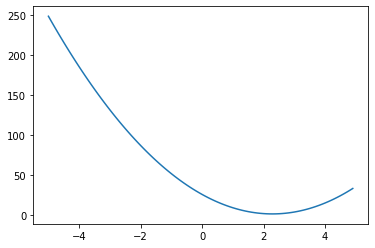

In [47]:
xtrain=[1,2,3] # 입력값
ytrain=[1,2,3] # hf(예측값)과 비교할 실제 결과값
w=tf.placeholder(tf.float32)
hf=xtrain*w+b 
cost=tf.reduce_mean(tf.square(hf-ytrain)) 
sess=tf.Session() # 세션 생성
sess.run(tf.global_variables_initializer())  # 변수 초기화
wvList=[]
cvList=[]
# training(머신러닝)
for step in range(-50,50):
    fw=step*0.1
    cv,wv=sess.run([cost,w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.plot(wvList, cvList)
plt.show()

In [43]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
b=tf.Variable([-3.],tf.float32) # b는 계속 갱신되는 데이터이므로 --> 변수(Variable) 타입이어야한다
w=tf.Variable([100.],tf.float32)

hf=x*w+b
loss = tf.reduce_sum(tf.square(hf-y)) # 계산하면 차원이 줄어들어서 reduce_가 붙는다
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss) # 러닝레이트 값을 1로 주면 발산(미분값이 1이라는 것, 너무 작으면 변화거의 없음)
xtrain=[1,2,3,4]
ytrain=[0,-1,-2,-3]

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):   
    sess.run(train,feed_dict={x:xtrain,y:ytrain})
    if step %20==0:
        wv,bv,lv = sess.run([w,b,loss],feed_dict={x:xtrain,y:ytrain})
        print("w:%s, b:%s, loss:%s" % (wv,bv,lv))

w:[99.999405], b:[-3.0001988], loss:298010.03
w:[99.9875], b:[-3.0041757], loss:297931.0
w:[99.9756], b:[-3.0081525], loss:297851.94
w:[99.9637], b:[-3.0121286], loss:297772.88
w:[99.9518], b:[-3.0161006], loss:297693.8
w:[99.939896], b:[-3.0200727], loss:297614.8
w:[99.92799], b:[-3.0240448], loss:297535.8
w:[99.91609], b:[-3.0280168], loss:297456.8
w:[99.90419], b:[-3.0319889], loss:297377.8
w:[99.89229], b:[-3.035961], loss:297298.84
w:[99.88039], b:[-3.039933], loss:297219.84
w:[99.868484], b:[-3.043905], loss:297140.88
w:[99.85658], b:[-3.0478756], loss:297061.94
w:[99.84468], b:[-3.051843], loss:296983.0
w:[99.83278], b:[-3.0558102], loss:296904.12
w:[99.82088], b:[-3.0597775], loss:296825.2
w:[99.808975], b:[-3.0637448], loss:296746.3
w:[99.79707], b:[-3.067712], loss:296667.44
w:[99.78517], b:[-3.0716794], loss:296588.53
w:[99.77327], b:[-3.0756466], loss:296509.7
w:[99.76137], b:[-3.079614], loss:296430.8
w:[99.749466], b:[-3.083579], loss:296351.97
w:[99.737564], b:[-3.087541

In [56]:
xtrain=[1,2,3]
ytrain=[2,4,7]
w=tf.Variable(5.0)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [57]:
hf=x*w
cost = tf.reduce_mean(tf.square(hf-y))

In [60]:
# train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
lr=0.01
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-lr*gradient # 업데이트 되어야 할 w 값을 구하는 노드
update=w.assign(descent) # assign() : w값을 업데이트 해주라는 함수

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(20):
    sess.run(update,feed_dict={x:xtrain,y:ytrain}) # --> w를 계속 업데이트 해줌으로써 cost값도 계속 바뀐다
    print(step,sess.run(cost,feed_dict={x:xtrain,y:ytrain})) # --> cost가 낮아지는 쪽으로 계속 업데이트 된다

0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


In [59]:
for step in range(100):
    print(step,sess.run(w))
    sess.run(train)    

0 4.87
1 4.87
2 4.87
3 4.87
4 4.87
5 4.87
6 4.87
7 4.87
8 4.87
9 4.87
10 4.87
11 4.87
12 4.87
13 4.87
14 4.87
15 4.87
16 4.87
17 4.87
18 4.87
19 4.87
20 4.87
21 4.87
22 4.87
23 4.87
24 4.87
25 4.87
26 4.87
27 4.87
28 4.87
29 4.87
30 4.87
31 4.87
32 4.87
33 4.87
34 4.87
35 4.87
36 4.87
37 4.87
38 4.87
39 4.87
40 4.87
41 4.87
42 4.87
43 4.87
44 4.87
45 4.87
46 4.87
47 4.87
48 4.87
49 4.87
50 4.87
51 4.87
52 4.87
53 4.87
54 4.87
55 4.87
56 4.87
57 4.87
58 4.87
59 4.87
60 4.87
61 4.87
62 4.87
63 4.87
64 4.87
65 4.87
66 4.87
67 4.87
68 4.87
69 4.87
70 4.87
71 4.87
72 4.87
73 4.87
74 4.87
75 4.87
76 4.87
77 4.87
78 4.87
79 4.87
80 4.87
81 4.87
82 4.87
83 4.87
84 4.87
85 4.87
86 4.87
87 4.87
88 4.87
89 4.87
90 4.87
91 4.87
92 4.87
93 4.87
94 4.87
95 4.87
96 4.87
97 4.87
98 4.87
99 4.87


In [3]:
num_points=200
vectors_set=[]
for i in range(num_points):
    x=np.random.normal(5,5)+15
    y=x*1000+np.random.normal(0,3)*1000
    vectors_set.append([x,y])
vectors_set

xdata = [v[0] for v in vectors_set]
ydata = [v[1] for v in vectors_set]

W0729 15:01:40.830834 10720 legend.py:1282] No handles with labels found to put in legend.


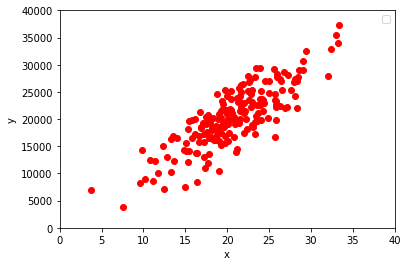

In [13]:
plt.plot(xdata,ydata,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,40])
plt.ylim([0,40000])
plt.legend()

In [16]:
w=tf.Variable(tf.random_uniform([1],-1.0,1.0))
b=tf.Variable(tf.zeros([1]))
y=w*xdata+b

loss=tf.reduce_mean(tf.square(y-ydata))
train=tf.train.GradientDescentOptimizer(0.001).minimize(loss)

sess=tf.Session()
sess.run(tf.initialize_all_variables())

0 [896.7827] [40.99701]
0 12702269.0


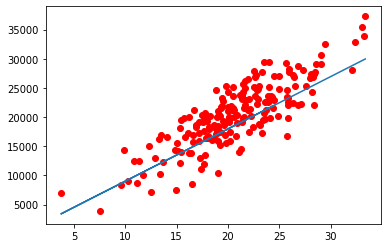

1 [975.9554] [44.66323]
1 9284065.0


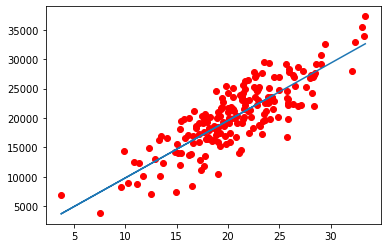

2 [982.94385] [45.033264]
2 9257414.0


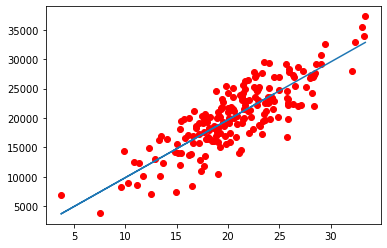

3 [983.55884] [45.112255]
3 9257204.0


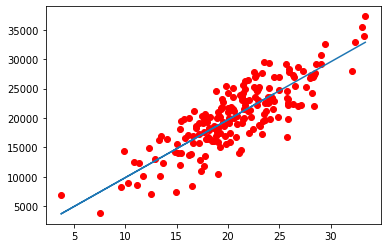

4 [983.6111] [45.165543]
4 9257200.0


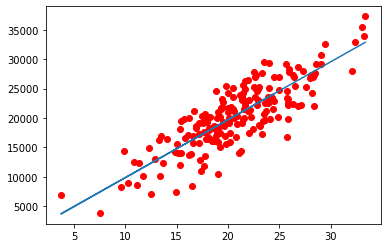

5 [983.6135] [45.216553]
5 9257197.0


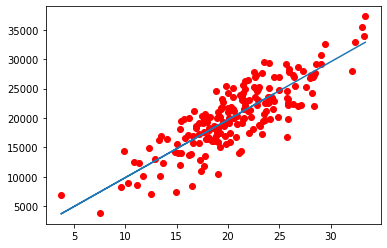

6 [983.61163] [45.267357]
6 9257195.0


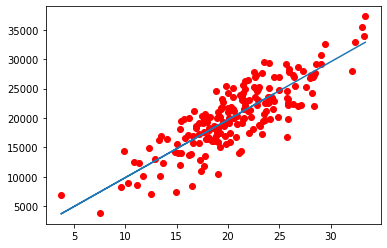

7 [983.6093] [45.31814]
7 9257192.0


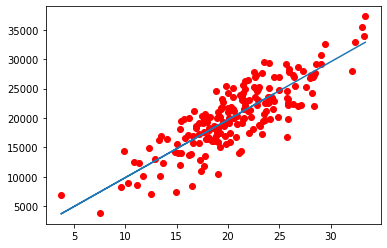

8 [983.607] [45.368916]
8 9257190.0


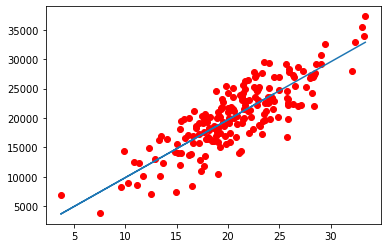

9 [983.6047] [45.41969]
9 9257187.0


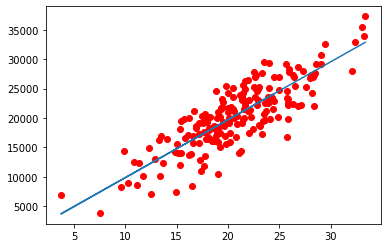

In [17]:
for step in range(10):
    sess.run(train)
    print(step,sess.run(w),sess.run(b))
    print(step,sess.run(loss))
    plt.plot(xdata,ydata,'ro')
    plt.plot(xdata,sess.run(w)*xdata+sess.run(b))
    plt.show()